# BABAR NASEER
**Email:** kh.babar.naseer@outlook.com



 TASK : **Scenario-Based Assignment**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

In [66]:
df = pd.read_csv("sales_data.csv")

print("")

In [67]:
print(df)
print("-------------------------------")
print("Data Loaded")

           Date    Product  SalesQuantity  SalesRevenue Region
0    2024-03-18  Product_A             52    383.744229  South
1    2023-12-30  Product_D             93    632.629684  South
2    2023-09-08  Product_D             15    151.922925  South
3    2023-06-28  Product_C             72    459.142991  North
4    2023-07-01  Product_D             61    391.153644  North
..          ...        ...            ...           ...    ...
495  2023-12-10  Product_D             93   1752.529523   East
496  2023-01-11  Product_B             67    803.028623   West
497  2023-03-03  Product_E             76    928.154155   West
498  2023-11-29        NaN             26    488.197343   West
499  2023-08-14  Product_C             16    220.896374  North

[500 rows x 5 columns]
-------------------------------
Data Loaded


### Data Exploration

In [68]:
df.head(10)

,Date,Product,SalesQuantity,SalesRevenue,Region
0,2024-03-18,Product_A,52,383.744229,South
1,2023-12-30,Product_D,93,632.629684,South
2,2023-09-08,Product_D,15,151.922925,South
3,2023-06-28,Product_C,72,459.142991,North
4,2023-07-01,Product_D,61,391.153644,North
5,2023-06-01,Product_E,21,203.095192,East
6,2023-01-25,Product_E,83,1634.490608,East
7,2024-03-30,Product_C,87,663.806002,North
8,2023-06-29,NaN,75,394.306240,East
9,2023-07-17,Product_B,75,1233.784976,North


In [69]:
df.describe()

,SalesQuantity,SalesRevenue
count,500.000000,500.000000
mean,49.510000,625.788269
std,29.392955,445.375067
min,1.000000,5.477070
25%,24.000000,293.115250
50%,51.000000,541.519413
75%,73.000000,919.996524
max,99.000000,1956.608145


In [70]:
df.dtypes

Date              object
Product           object
SalesQuantity      int64
SalesRevenue     float64
Region            object
dtype: object

### Data Cleaning

In [71]:
print("Missing Values")
df.isnull().sum()

Missing Values


Date              0
Product          25
SalesQuantity     0
SalesRevenue      0
Region           25
dtype: int64

In [72]:
essential_cols = ['Date', 'Product', 'SalesQuantity', 'SalesRevenue', 'Region']
df.dropna(subset=essential_cols, inplace=True)


df.fillna(df.mean(numeric_only=True), inplace=True)



In [73]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert categorical columns to categorical data type
df['Product'] = df['Product'].astype('category')
df['Region'] = df['Region'].astype('category')


In [74]:
df.isnull().sum()

Date             0
Product          0
SalesQuantity    0
SalesRevenue     0
Region           0
dtype: int64

### Data Analysis

**Sales Over Time**

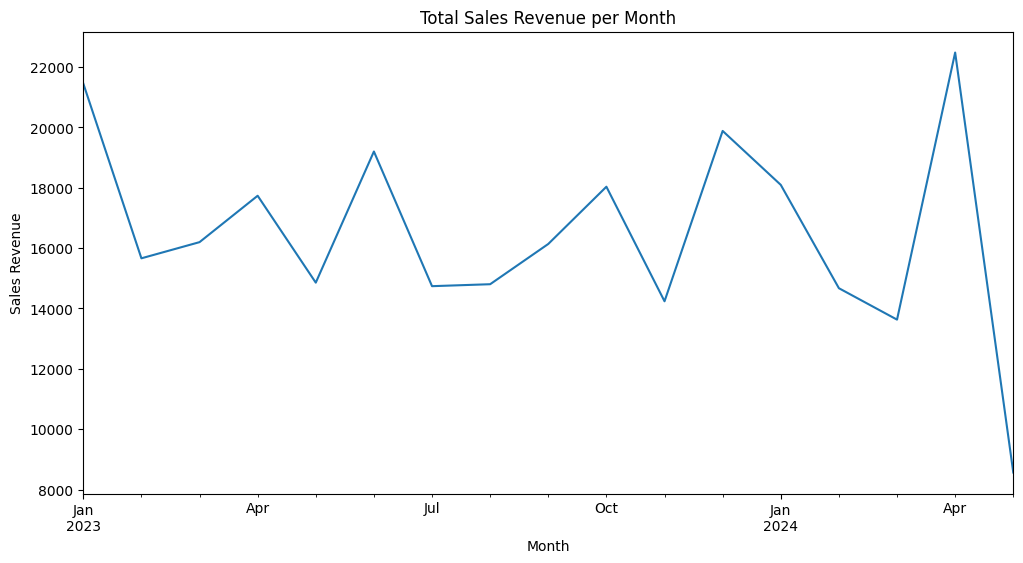

In [76]:

df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.to_period('M')


monthly_sales = df.groupby('Month')['SalesRevenue'].sum()


monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Total Sales Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.show()


**Regional Sales Performance:**

C:\Users\pc\AppData\Local\Temp\ipykernel_11544\4217883546.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_sales = df.groupby('Region')['SalesRevenue'].sum()


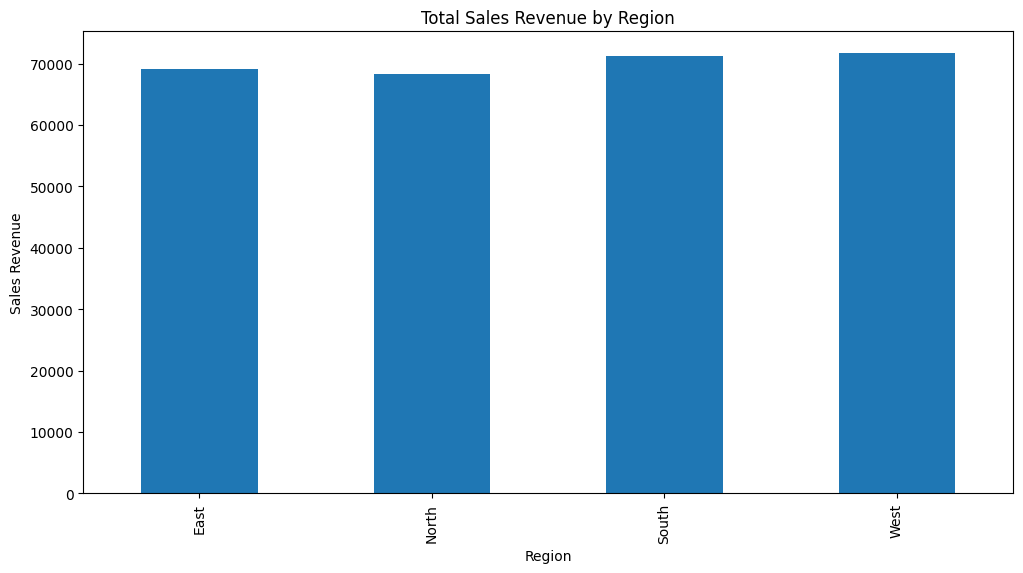

In [77]:

regional_sales = df.groupby('Region')['SalesRevenue'].sum()


regional_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Sales Revenue')
plt.show()


**Top-Selling Products:**

C:\Users\pc\AppData\Local\Temp\ipykernel_11544\1807381553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product')['SalesRevenue'].sum().nlargest(5)


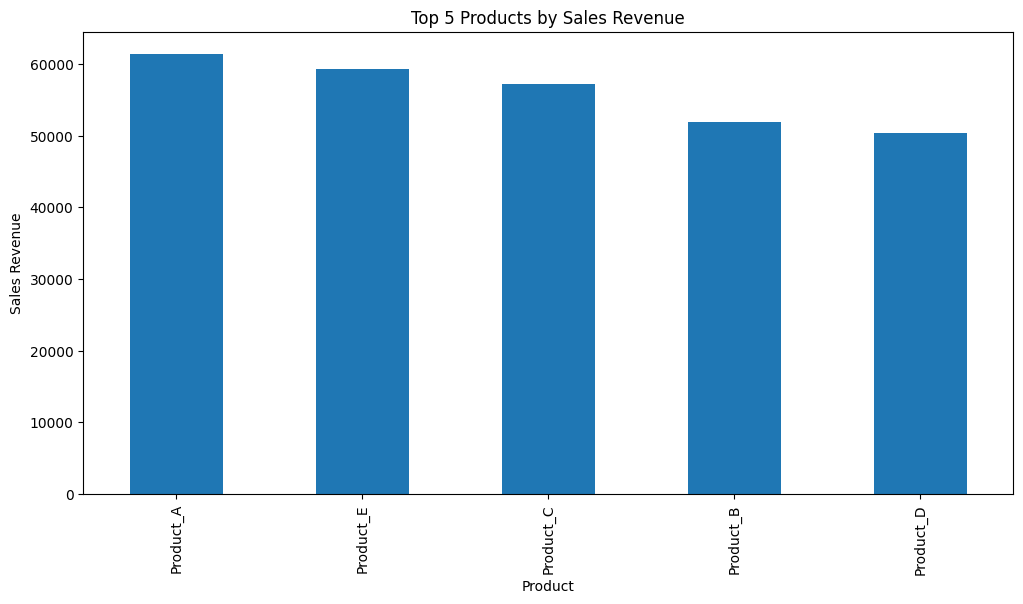

In [78]:

top_products = df.groupby('Product')['SalesRevenue'].sum().nlargest(5)

# Plot the results
top_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Products by Sales Revenue')
plt.xlabel('Product')
plt.ylabel('Sales Revenue')
plt.show()
